In [1]:
import gym

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 

from lcs import Perception
from lcs.agents import EnvironmentAdapter
from lcs.metrics import population_metrics

import lcs.agents.acs2 as acs2
import lcs.agents.aacs2 as aacs2
import lcs.agents.acs2ar as acs2ar

import random
from collections import namedtuple

# Logger
import logging
logging.basicConfig(level=logging.INFO)

import gym_grid
grid20 = gym.make('grid-20-v0')
grid40 = gym.make('grid-40-v0')

In [2]:
def common_metrics(agent, env):
    pop = agent.get_population()

    metrics = {
        'agent': agent.__class__.__name__,
        'reliable': len([cl for cl in pop if cl.is_reliable()]),
    }

    if hasattr(agent, 'rho'):
        metrics['rho'] = agent.rho
    else:
        metrics['rho'] = 0

    metrics.update(population_metrics(pop, env))
    return metrics

In [3]:
# SET THE ENVIRONMENT
env = grid20

state_to_actions = env.env._state_action()
len(state_to_actions)

400

In [4]:
StateAction = namedtuple('StateAction', 'id state action')

state_action = []

idx = 1
for state, actions in state_to_actions.items():
    if len(actions) > 0:
        for action in actions:
            state_action.append(StateAction(idx, state, action))
            idx += 1
            
len(state_action)

1518

In [5]:
state_action[:10]

[StateAction(id=1, state=('1', '1'), action=1),
 StateAction(id=2, state=('1', '1'), action=2),
 StateAction(id=3, state=('1', '2'), action=0),
 StateAction(id=4, state=('1', '2'), action=1),
 StateAction(id=5, state=('1', '2'), action=2),
 StateAction(id=6, state=('1', '3'), action=0),
 StateAction(id=7, state=('1', '3'), action=1),
 StateAction(id=8, state=('1', '3'), action=2),
 StateAction(id=9, state=('1', '4'), action=0),
 StateAction(id=10, state=('1', '4'), action=1)]

In [6]:
# create a dict id > perception (for q-learning)

unique_states = {sa.state for sa in state_action}
sp = {}
for idx, state in enumerate(unique_states):
    sp[idx] = state

In [7]:
def find_state_id(state):
    for sp_id, sp_state in sp.items():
        if sp_state == state:
            return sp_id
    return None

In [8]:
sp[164]

('16', '9')

# Agent estimations

In [9]:
learning_rate = 0.1
discount_factor = 0.95
epsilon = 0.1
zeta = 0.0001

In [10]:
%%time

acs2_cfg = acs2.Configuration(2, 4,
                         do_ga=False,
                         beta=learning_rate,
                         epsilon=1-epsilon,
                         gamma=discount_factor,
                         biased_exploration_prob=0.8)


acs2_agent = acs2.ACS2(acs2_cfg)
acs2_population, _ = acs2_agent.explore(env, 1500)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 2000, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 1525, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 424, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 450, 'steps_in_trial': 2000, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 1821, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 750, 'steps_in_trial': 813, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 632, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 1050, 'steps_in_trial': 316, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 866, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 1350, 'steps_in_trial': 2000, 'reward': 0}


CPU times: user 10min 49s, sys: 5.45 s, total: 10min 55s
Wall time: 12min 21s


In [11]:
%%time

aacs2_cfg = aacs2.Configuration(2, 4,
                         do_ga=False,
                         beta=learning_rate,
                         epsilon=1-epsilon,
                         gamma=discount_factor,
                         biased_exploration_prob=0.8)


aacs2_agent = aacs2.AACS2(aacs2_cfg)
aacs2_population, _ = aacs2_agent.explore_exploit(env, 3000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 572, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 2000, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 531, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 1991, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 2000, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 2000, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 1800, 'steps_in_trial': 1759, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 2100, 'steps_in_trial': 2000, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 2400, 'steps_in_trial': 720, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 2700, 'steps_in_trial': 757, 'reward': 1000}


CPU times: user 22min 35s, sys: 2.03 s, total: 22min 37s
Wall time: 22min 48s


In [12]:
ns = find_state_id(('19', '15'))

Q[ns, :]

NameError: name 'Q' is not defined

In [13]:
%%time

acs2ar_cfg = acs2ar.Configuration(2, 4,
                         do_ga=False,
                         beta=learning_rate,
                         epsilon=1-epsilon,
                         gamma=discount_factor,
                         zeta=zeta,
                         biased_exploration_prob=0.8)


acs2ar_agent = acs2ar.ACS2AR(acs2ar_cfg)
acs2ar_population, _ = acs2ar_agent.explore_exploit(env, 3000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 105, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 1891, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 1006, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 2000, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 23, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 2000, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 1800, 'steps_in_trial': 635, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 2100, 'steps_in_trial': 55, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 2400, 'steps_in_trial': 28, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 2700, 'steps_in_trial': 2000, 'reward': 0}


CPU times: user 21min 21s, sys: 2.95 s, total: 21min 24s
Wall time: 21min 51s


In [14]:
%%time

# Q = np.zeros((len(sp), env.action_space.n))
episodes = 1000 # 50_000

print(f"All elements\t: {Q.shape[0] * Q.shape[1]}")

for i in range(1, episodes):
#     print(f"\nEPISODE {i}")

    if i % 5000 == 0:
        print(f"Episode {i}")
        print(f"\tNon zero\t: {np.count_nonzero((Q))}")
        
    obs = env.reset()
    state = find_state_id(obs)
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        next_obs, reward, done, info = env.step(action)
        next_state = find_state_id(next_obs)
        
#         if reward != 0:
#             print(f"******* REWARD ******* ")
        
        if next_state is not None:
            discounted = np.max(Q[next_state, :])
        else:
            discounted = 0
        
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * discounted - Q[state, action])
        
#         print(f"{state} == ({action}) ==> {next_state} (r: {reward})\tQ[{state}, {action}]: {Q[state, action]}")
        state = next_state

NameError: name 'Q' is not defined

In [ ]:
%%time

episodes = 1000 #50_000

R = np.zeros((len(sp), env.action_space.n))
rho = 0

for i in range(1, episodes):
    state = find_state_id(env.reset())

    if i % 1000 == 0:
        print(f"\tEpisode {i}. Non zero\t: {np.count_nonzero((R))}")

    was_greedy = False
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(R[state, :])
            was_greedy = True

        next_state, reward, done, info = env.step(action)
        next_state = find_state_id(next_state)

        if next_state is not None:
            discounted = np.max(R[next_state, :])
        else:
            discounted = 0

        R[state, action] = R[state, action] + learning_rate * (reward - rho + discounted - R[state, action])

        if was_greedy:
            rho = rho + zeta * (reward + np.max(R[next_state, :]) - discounted - rho)

        state = next_state 

# Payoff landscape

In [20]:
%%time

payoffs = {}

for sa in state_action:
    p = Perception(sa.state)
    
    # ACS2
    acs2_match_set = acs2_population.form_match_set(p)
    acs2_action_set = acs2_match_set.form_action_set(sa.action)
    
#     AACS2
    aacs2_match_set = aacs2_population.form_match_set(p)
    aacs2_action_set = aacs2_match_set.form_action_set(sa.action)
    
    # ACS2AR
    acs2ar_match_set = acs2ar_population.form_match_set(p)
    acs2ar_action_set = acs2ar_match_set.form_action_set(sa.action)
    
    payoffs[sa] = {
        'acs2': np.mean(list(map(lambda cl: cl.r, acs2_action_set))),
        'aacs2': np.mean(list(map(lambda cl: cl.r, aacs2_action_set))),
        'acs2ar': np.mean(list(map(lambda cl: cl.r, acs2ar_action_set))),
#         'q-learning': Q[find_state_id(sa.state), sa.action],
#         'r-learning': R[find_state_id(sa.state), sa.action]
    }

CPU times: user 1.15 s, sys: 10.5 ms, total: 1.16 s
Wall time: 1.22 s


## Plot results

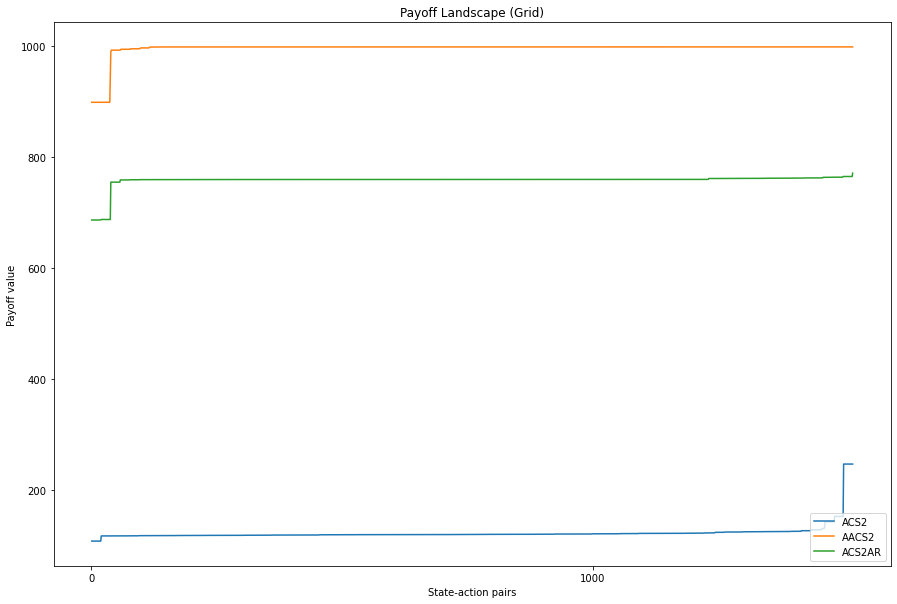

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))

x = range(1, len(payoffs)+1)
y_acs2 = sorted([v['acs2'] for k, v in payoffs.items()])
y_aacs2 = sorted([v['aacs2'] for k, v in payoffs.items()])
y_acs2ar = sorted([v['acs2ar'] for k, v in payoffs.items()])
# y_qlearning = sorted([v['q-learning'] for k, v in payoffs.items()])
# y_rlearning = sorted([v['r-learning'] for k, v in payoffs.items()])

# ACS2
# plt.scatter(x, y_acs2)
plt.plot(x, y_acs2, label='ACS2')

# AACS2
# plt.scatter(x, y_aacs2)
plt.plot(x, y_aacs2, label='AACS2')

# ACS2AR
# plt.scatter(x, y_acs2ar)
plt.plot(x, y_acs2ar, label='ACS2AR')

# Q-learning
# plt.scatter(x, y_qlearning)
# plt.plot(x, y_qlearning, label='Q-learning')

# R-learning
# plt.scatter(x, y_rlearning)
# plt.plot(x, y_rlearning, label='R-learning')

ax.xaxis.set_major_locator(MultipleLocator(1000)) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%1.0f')) 

ax.set_xlabel("State-action pairs")
ax.set_ylabel("Payoff value")
ax.set_title("Payoff Landscape (Grid)")

ax.legend(loc='lower right')

plt.show()